# Estudio de las métricas utilizadas para los Árboles de decisión

En esta hoja se va a estudiar como de necesarias son las métricas calculadas para el entreno del modelo del Árbol de decisión.

Para realizar el estudio vamos a quitar del dataset los atributos relacionados con agrupamientos, con comunidades, con núcleos, y con centralidad, de esta forma veremos como incide en los resultados cada métrica.

Vamos a empezar importando las librerias y funciones que utilizaremos más adelante.

In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.tree import plot_tree

# Lectura de datos y creación de los atributos y el objetivo

Vamos a empezar por importar el dataset con todos lo atributos que calculamos para la realización de este trabajo. Luego separamos el dataset en atributos por los cuales el árbol se va a entrenar, estos a su vez lo separamos en discretos y continuos para tratarlos mas adelante. Y por último elegiremos el objetivo, en este caso es un objetivo categórico.

In [146]:
# Lectura de los csv
 
# Tabla con todas las métricas
nodes = pd.read_csv("../tablas/tableWithAllAtributes.csv")

# Tabla con todos los atributos sin los de agrupamiento
nodesWithoutClustering = pd.read_csv("../tablas/tableWithoutClustering.csv")

# Tabla con todos los atributos sin los de comunidades
nodesWithoutCommunity = pd.read_csv("../tablas/tableWithoutCommunity.csv")

# Tabla con todos los atributos sin los de nucleos
nodesWithoutKernel = pd.read_csv("../tablas/tableWithoutKernel.csv")

# Tabla con todos los atributos sin los de centralidad
nodesWithoutCentrality = pd.read_csv("../tablas/tableWithoutCentrality.csv")


In [147]:
# Preparación de los datos para la tabla con todos los atributos
atributos_all_discretos = ['name']
atributos_all_continuos = ['degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient','Square clustering','triangles','greedy_modularity_communities','Core number','asyn_lpa_communities']
atributos_all = nodes.loc[:,['id_node'] + atributos_all_discretos + atributos_all_continuos]

# Preparación de los datos para la tabla sin los atributos sin los de agrupamiento
atributos_WithoutClustering_discretos = ['name']
atributos_WithoutClustering_continuos = ['degree_centrality','closeness_centrality','betweenness_centrality','greedy_modularity_communities','Core number','asyn_lpa_communities']
atributos_WithoutClustering = nodesWithoutClustering.loc[:,['id_node'] + atributos_WithoutClustering_discretos + atributos_WithoutClustering_continuos]

# Preparación de los datos para la tabla sin los atributos sin los de comunidades
atributos_WithoutCommunity_discretos = ['name']
atributos_WithoutCommunity_continuos = ['degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient','Square clustering','triangles','Core number']
atributos_WithoutCommunity = nodesWithoutCommunity.loc[:,['id_node'] + atributos_WithoutCommunity_discretos + atributos_WithoutCommunity_continuos]

# Preparación de los datos para la tabla sin los atributos sin los de núcleos
atributos_WithoutKernel_discretos = ['name']
atributos_WithoutKernel_continuos = ['degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient','Square clustering','triangles','greedy_modularity_communities','asyn_lpa_communities']
atributos_WithoutKernel = nodesWithoutKernel.loc[:,['id_node'] + atributos_WithoutKernel_discretos + atributos_WithoutKernel_continuos]

# Preparación de los datos para la tabla sin los atributos sin los de centralidad
atributos_WithoutCentrality_discretos = ['name']
atributos_WithoutCentrality_continuos = ['clustering_coefficient','Square clustering','triangles','greedy_modularity_communities','Core number','asyn_lpa_communities']
atributos_WithoutCentrality = nodesWithoutCentrality.loc[:,['id_node'] + atributos_WithoutCentrality_discretos + atributos_WithoutCentrality_continuos]


In [148]:
# Elección del objetivo
objetivo = nodes['ml_target']
objetivo.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: ml_target, dtype: float64

# Tratamiento de los datos

Vamos a tener que discretizar la columna name, ya que el árbol con cadenas no puede trabajar. Pues con la siguente función convertimos las cadenas en número y a esos numero los vamos a nomrmalizar entre 0 y 1, de forma que cogeremos el máximo y el mínimo para ello.

In [149]:
# Codificación
codificador_atributos_discretos = OrdinalEncoder() # Crear una instancia de la clase correspondiente
codificador_atributos_discretos.fit(atributos_all[atributos_all_discretos]) # Usar el método fit para ajustar a los datos los parámetros de la codificación
codificador_atributos_discretos.fit(atributos_WithoutClustering[atributos_WithoutClustering_discretos]) 
codificador_atributos_discretos.fit(atributos_WithoutCommunity[atributos_WithoutCommunity_discretos]) 
codificador_atributos_discretos.fit(atributos_WithoutKernel[atributos_WithoutKernel_discretos]) 
codificador_atributos_discretos.fit(atributos_WithoutCentrality[atributos_WithoutCentrality_discretos]) 


# Ahora aplicamos el método transform para codificar los datos
atributos_all[atributos_all_discretos] = codificador_atributos_discretos.transform(
    atributos_all[atributos_all_discretos]
)
atributos_WithoutClustering[atributos_WithoutClustering_discretos] = codificador_atributos_discretos.transform(
    atributos_WithoutClustering[atributos_WithoutClustering_discretos]
)
atributos_WithoutCommunity[atributos_WithoutCommunity_discretos] = codificador_atributos_discretos.transform(
    atributos_WithoutCommunity[atributos_WithoutCommunity_discretos]
)
atributos_WithoutKernel[atributos_WithoutKernel_discretos] = codificador_atributos_discretos.transform(
    atributos_WithoutKernel[atributos_WithoutKernel_discretos]
)
atributos_WithoutCentrality[atributos_WithoutCentrality_discretos] = codificador_atributos_discretos.transform(
    atributos_WithoutCentrality[atributos_WithoutCentrality_discretos]
)


# Normalizamos el name
normalizador = MinMaxScaler(
    # Cada atributo se normaliza al intervalo [0, 1]
    feature_range=(0, 1)
)


# Aplicamos la normalización solo a la columna 'name'
atributos_all['name'] = normalizador.fit_transform(atributos_all[['name']])
atributos_WithoutClustering['name'] = normalizador.fit_transform(atributos_WithoutClustering[['name']])
atributos_WithoutCommunity['name'] = normalizador.fit_transform(atributos_WithoutCommunity[['name']])
atributos_WithoutKernel['name'] = normalizador.fit_transform(atributos_WithoutKernel[['name']])
atributos_WithoutCentrality['name'] = normalizador.fit_transform(atributos_WithoutCentrality[['name']])



# Validación por retención

Ahora vamos a comprobar que métricas son las más necesarias, para ello vamos a dividir cada dataset en datos de entrenamiento y datos de prubebas, en este caso vamos a devidir en un 80% de los datos para entrenar y un 20% para comprobar como se ha entrenado.

Para ello vamos a entrenar varios árboles, con los hiperparámetros de la profundidad de 5 nodos y que como mínimo debemos particionar con 5 ejemplos, que vimos que eran los mejores para el de todos los datos.

### Con todas las métricas

In [150]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_all_entrenamiento, atributos_all_prueba,
 objetivo_all_entrenamiento, objetivo_all_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_all, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=796140)

In [151]:
clasificador_all_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_all_CART.fit(atributos_all_entrenamiento, objetivo_all_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [152]:
predicciones_all = clasificador_all_CART.predict(atributos_all_prueba)

In [153]:
cm_all = confusion_matrix( objetivo_all_prueba,predicciones_all)
tabla_cm_all = pd.DataFrame(cm_all, index=["Verdadero Negativo", "Verdadero Positivo"], columns=["Predicho Negativo", "Predicho Positivo"])
print(tabla_cm_all)

                    Predicho Negativo  Predicho Positivo
Verdadero Negativo               5105                487
Verdadero Positivo                852               1096


In [154]:
recall_score_all = recall_score(predicciones_all, objetivo_all_prueba)
recall_score_all

0.6923562855337966

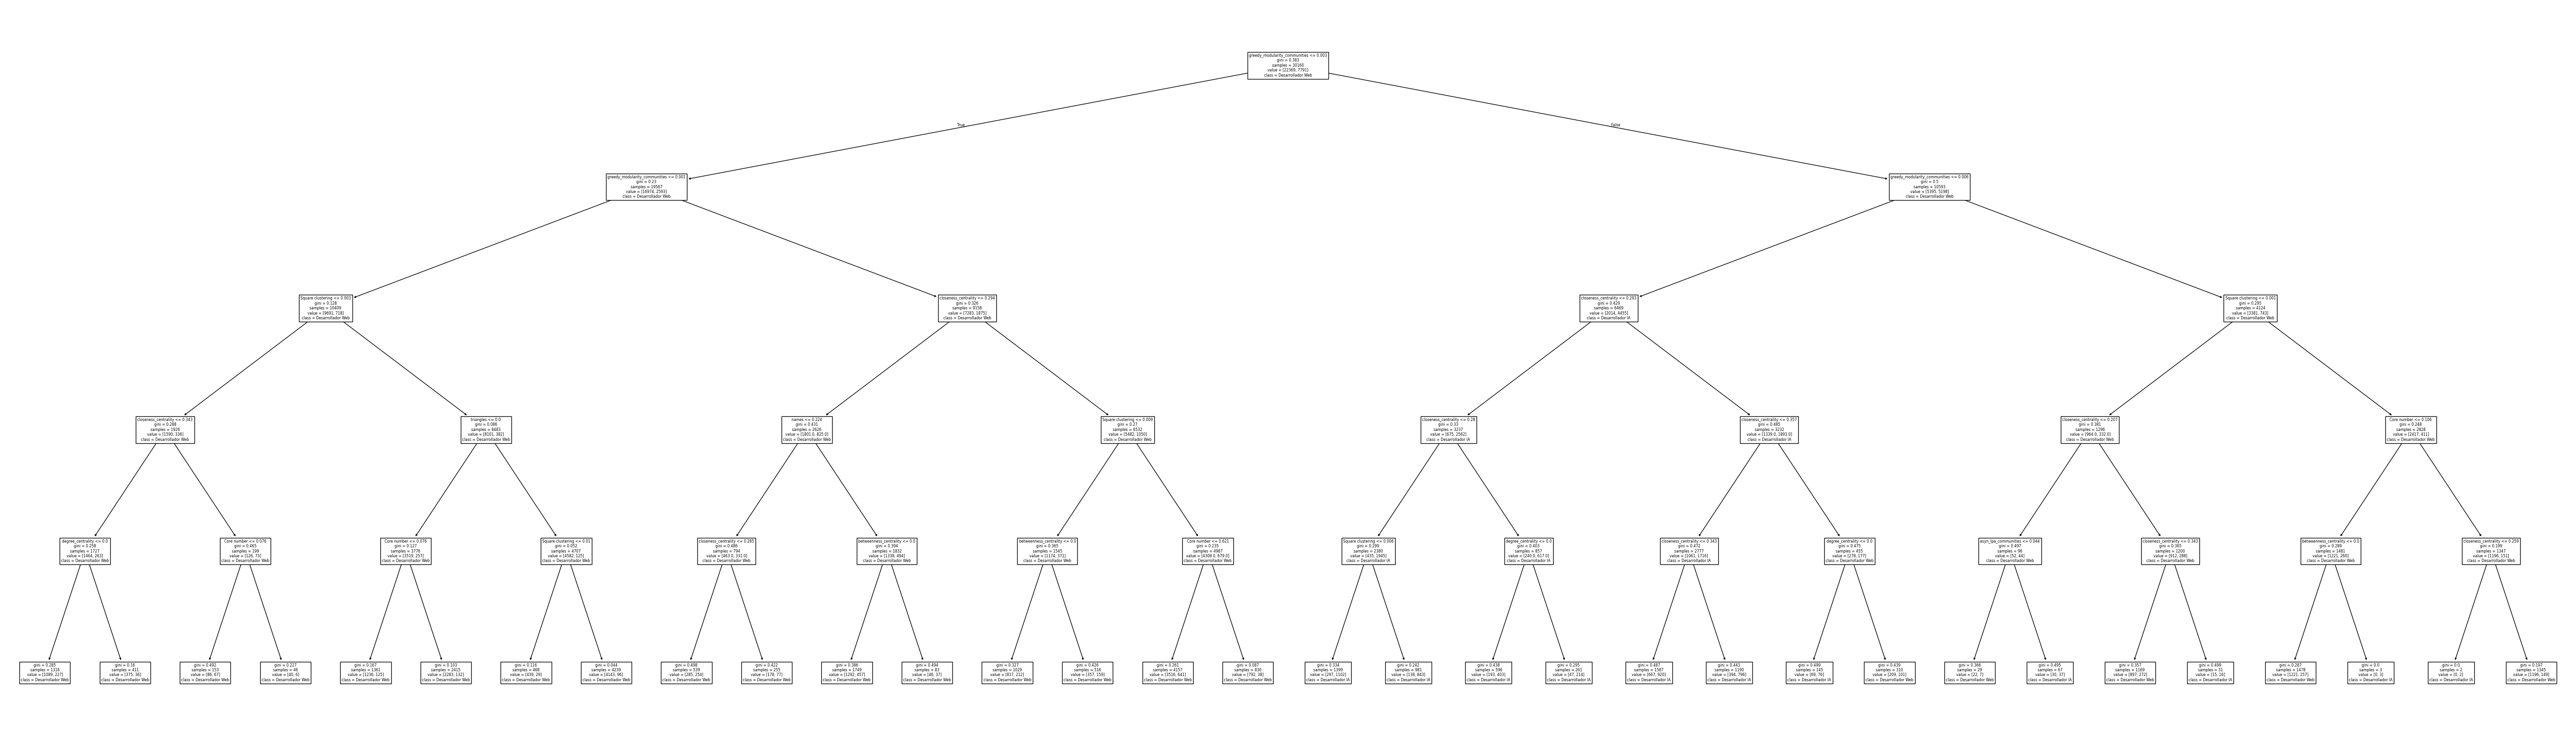

In [155]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol_all = plot_tree(clasificador_all_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=['id_node','names','degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient',
                                 'Square clustering','triangles','greedy_modularity_communities','Core number','asyn_lpa_communities']
,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

### Sin las métricas de agrupamiento

In [156]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_WithoutClustering_entrenamiento, atributos_WithoutClustering_prueba,
 objetivo_WithoutClustering_entrenamiento, objetivo_WithoutClustering_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_WithoutClustering, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=796140)

In [157]:
clasificador_WithoutClustering_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_WithoutClustering_CART.fit(atributos_WithoutClustering_entrenamiento, objetivo_WithoutClustering_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [158]:
predicciones_WithoutClustering = clasificador_WithoutClustering_CART.predict(atributos_WithoutClustering_prueba)

In [159]:
cm_WithoutClustering = confusion_matrix(objetivo_WithoutClustering_prueba,predicciones_WithoutClustering)
tabla_cm_WithoutClustering = pd.DataFrame(cm_WithoutClustering, index=["Verdadero Negativo", "Verdadero Positivo"], columns=["Predicho Negativo", "Predicho Positivo"])
print(tabla_cm_WithoutClustering)

                    Predicho Negativo  Predicho Positivo
Verdadero Negativo               5110                482
Verdadero Positivo                851               1097


In [160]:
recall_WithoutClustering_score = recall_score(predicciones_WithoutClustering, objetivo_WithoutClustering_prueba)
recall_WithoutClustering_score

0.694743508549715

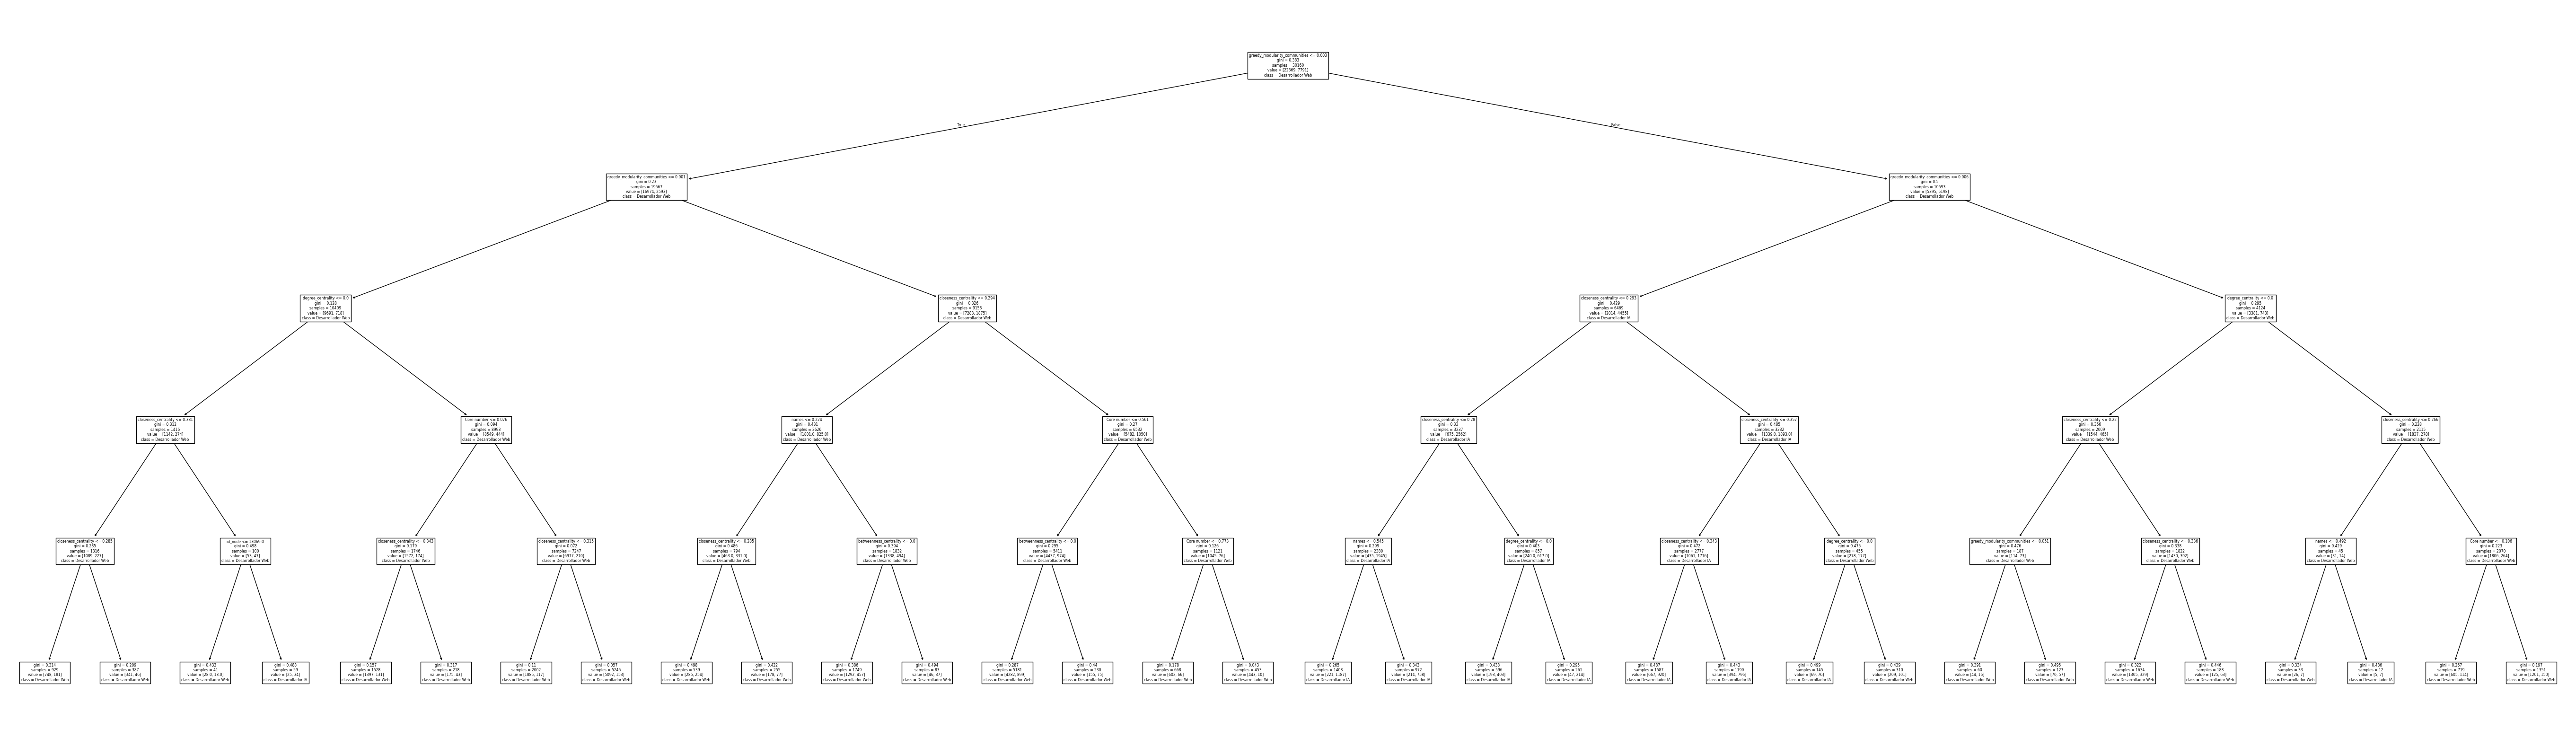

In [161]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol_WithoutClustering = plot_tree(clasificador_WithoutClustering_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=['id_node','names','degree_centrality','closeness_centrality','betweenness_centrality',
                                 'greedy_modularity_communities','Core number','asyn_lpa_communities'],
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

### Sin las métricas de comunidades

In [162]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_WithoutCommunity_entrenamiento, atributos_WithoutCommunity_prueba,
 objetivo_WithoutCommunity_entrenamiento, objetivo_WithoutCommunity_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_WithoutCommunity, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=796140)

In [163]:
clasificador_WithoutCommunity_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_WithoutCommunity_CART.fit(atributos_WithoutCommunity_entrenamiento, objetivo_WithoutCommunity_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [164]:
predicciones_WithoutCommunity = clasificador_WithoutCommunity_CART.predict(atributos_WithoutCommunity_prueba)

In [165]:
cm_WithoutCommunity = confusion_matrix(objetivo_WithoutCommunity_prueba,predicciones_WithoutCommunity)
tabla_cm_WithoutCommunity = pd.DataFrame(cm_WithoutCommunity, index=["Verdadero Negativo", "Verdadero Positivo"], columns=["Predicho Negativo", "Predicho Positivo"])
print(tabla_cm_WithoutCommunity)

                    Predicho Negativo  Predicho Positivo
Verdadero Negativo               5266                326
Verdadero Positivo               1579                369


In [166]:
recall_WithoutCommunity_score = recall_score(predicciones_WithoutCommunity, objetivo_WithoutCommunity_prueba)
recall_WithoutCommunity_score

0.5309352517985612

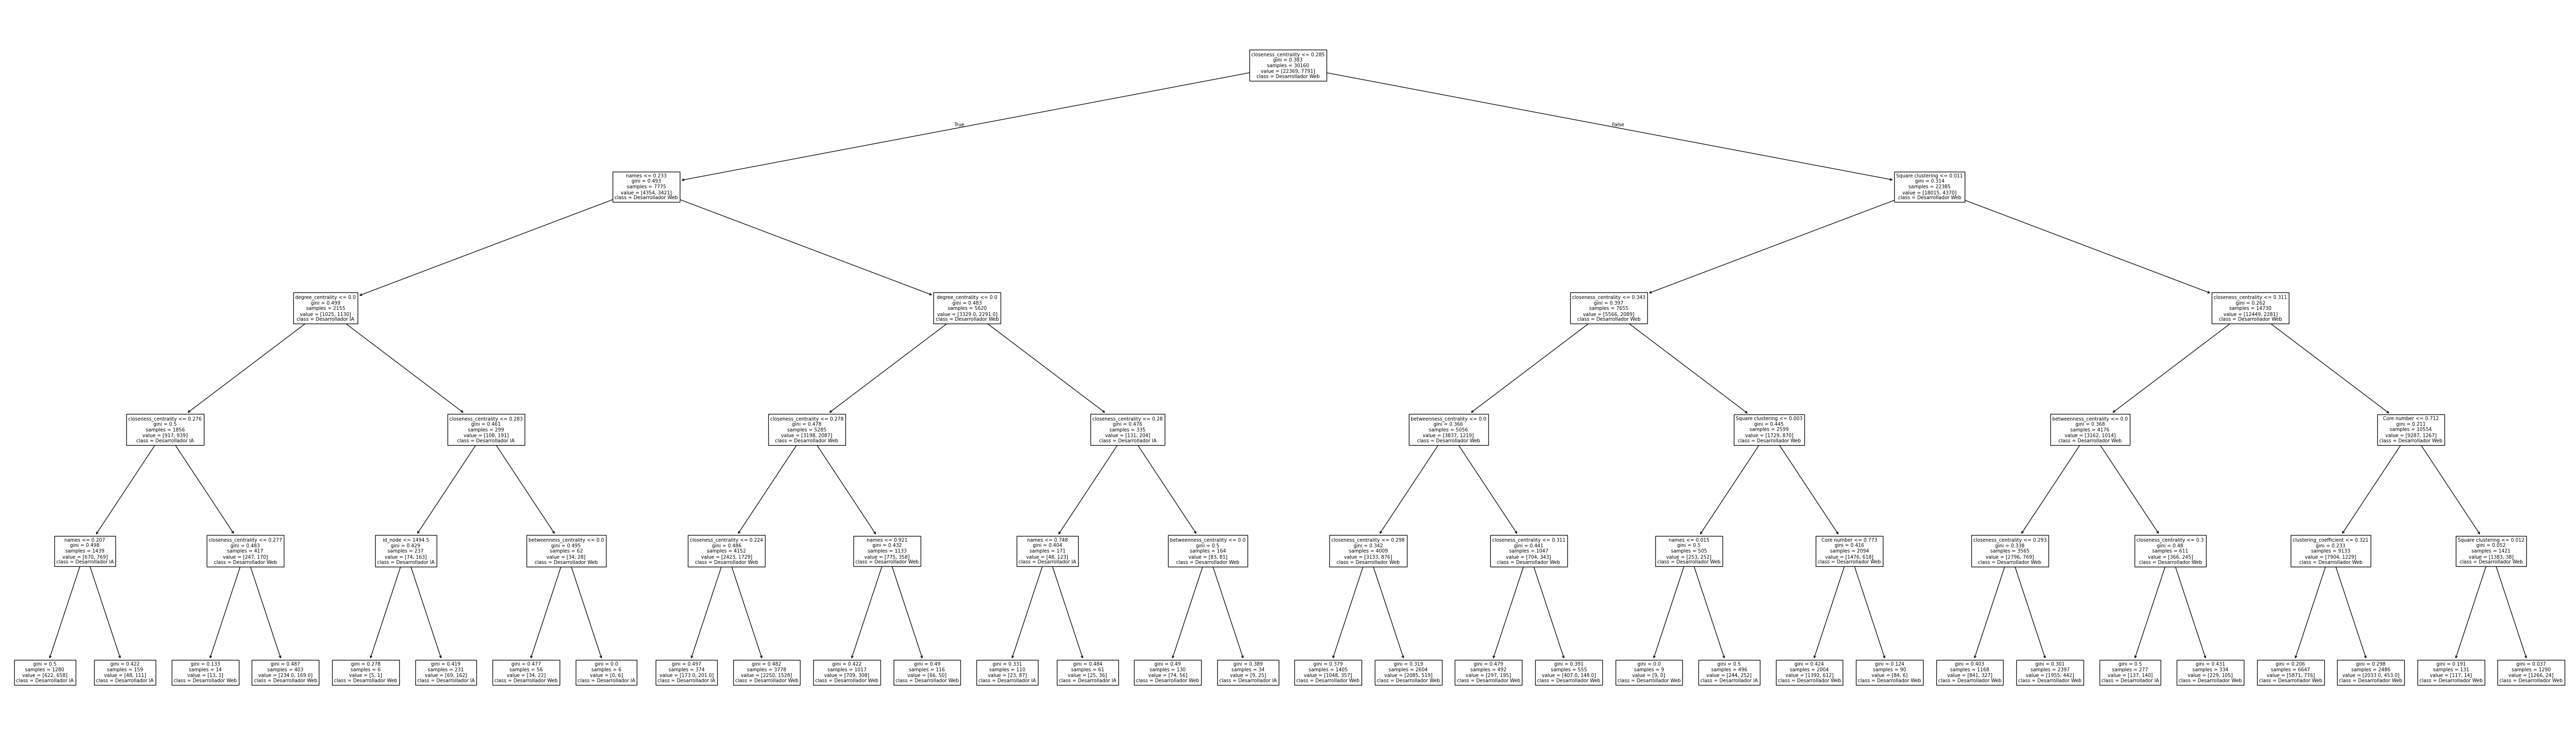

In [167]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol_WithoutCommunity = plot_tree(clasificador_WithoutCommunity_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=['id_node','names','degree_centrality','closeness_centrality','betweenness_centrality',
                                 'clustering_coefficient','Square clustering','triangles','Core number'],
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

### Sin las métricas de núcleo

In [168]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_WithoutKernel_entrenamiento, atributos_WithoutKernel_prueba,
 objetivo_WithoutKernel_entrenamiento, objetivo_WithoutKernel_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_WithoutKernel, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=796140)

In [169]:
clasificador_WithoutKernel_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_WithoutKernel_CART.fit(atributos_WithoutKernel_entrenamiento, objetivo_WithoutKernel_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [170]:
predicciones_WithoutKernel = clasificador_WithoutKernel_CART.predict(atributos_WithoutKernel_prueba)

In [171]:
cm_WithoutKernel = confusion_matrix( objetivo_WithoutKernel_prueba,predicciones_WithoutKernel)
tabla_cm_WithoutKernel = pd.DataFrame(cm_WithoutKernel, index=["Verdadero Negativo", "Verdadero Positivo"], columns=["Predicho Negativo", "Predicho Positivo"])
print(tabla_cm_WithoutKernel)

                    Predicho Negativo  Predicho Positivo
Verdadero Negativo               5105                487
Verdadero Positivo                852               1096


In [172]:
recall_WithoutKernel_score = recall_score(predicciones_WithoutKernel, objetivo_WithoutKernel_prueba)
recall_WithoutKernel_score

0.6923562855337966

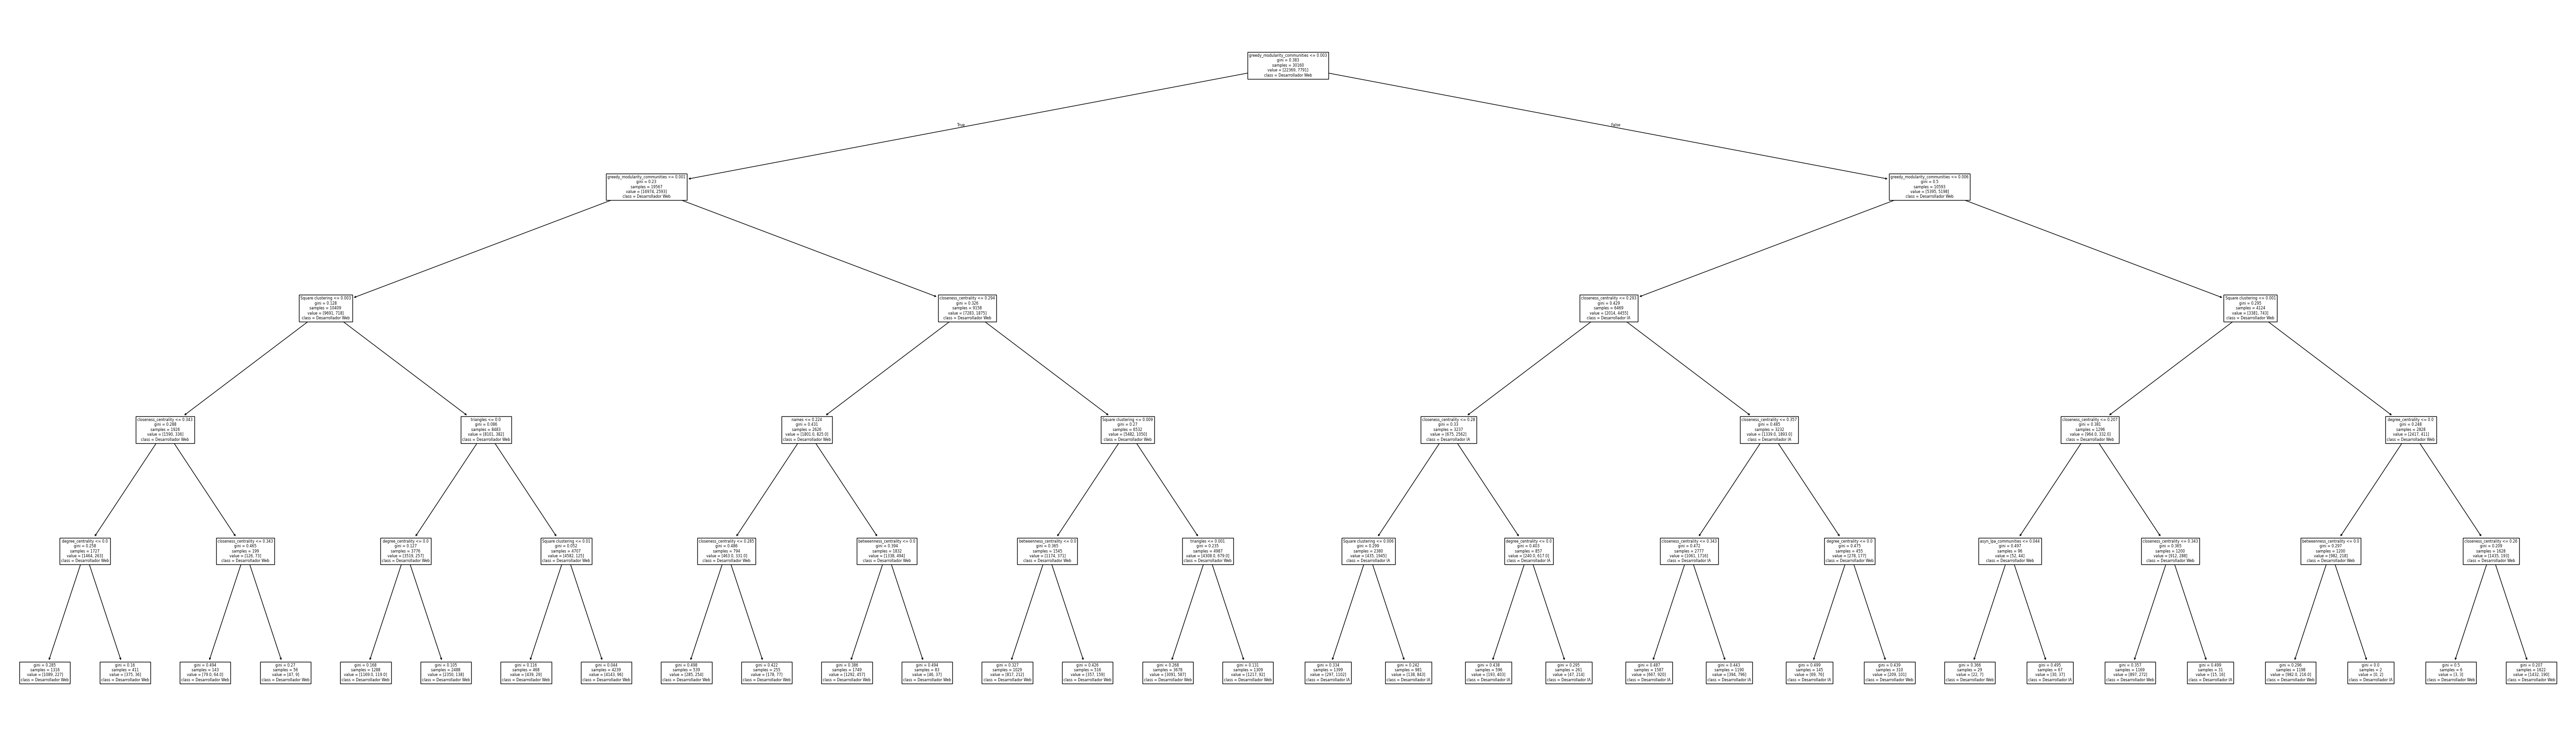

In [173]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol_WithoutKernel = plot_tree(clasificador_WithoutKernel_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=['id_node','names','degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient',
                                 'Square clustering','triangles','greedy_modularity_communities','asyn_lpa_communities'],
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

### Sin las métricas de centralidad

In [174]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_WithoutCentrality_entrenamiento, atributos_WithoutCentrality_prueba,
 objetivo_WithoutCentrality_entrenamiento, objetivo_WithoutCentrality_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_WithoutCentrality, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=796140)

In [175]:
clasificador_WithoutCentrality_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_WithoutCentrality_CART.fit(atributos_WithoutCentrality_entrenamiento, objetivo_WithoutCentrality_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [176]:
predicciones_WithoutCentrality = clasificador_WithoutCentrality_CART.predict(atributos_WithoutCentrality_prueba)

In [177]:
cm_WithoutCentrality = confusion_matrix(objetivo_WithoutCentrality_prueba,predicciones_WithoutCentrality)
tabla_cm_WithoutCentrality = pd.DataFrame(cm_WithoutCentrality, index=["Verdadero Negativo", "Verdadero Positivo"], columns=["Predicho Negativo", "Predicho Positivo"])
print(tabla_cm_WithoutCentrality)

                    Predicho Negativo  Predicho Positivo
Verdadero Negativo               5110                482
Verdadero Positivo                862               1086


In [178]:
recall_WithoutCentrality_score = recall_score(predicciones_WithoutCentrality, objetivo_WithoutCentrality_prueba)
recall_WithoutCentrality_score

0.6926020408163265

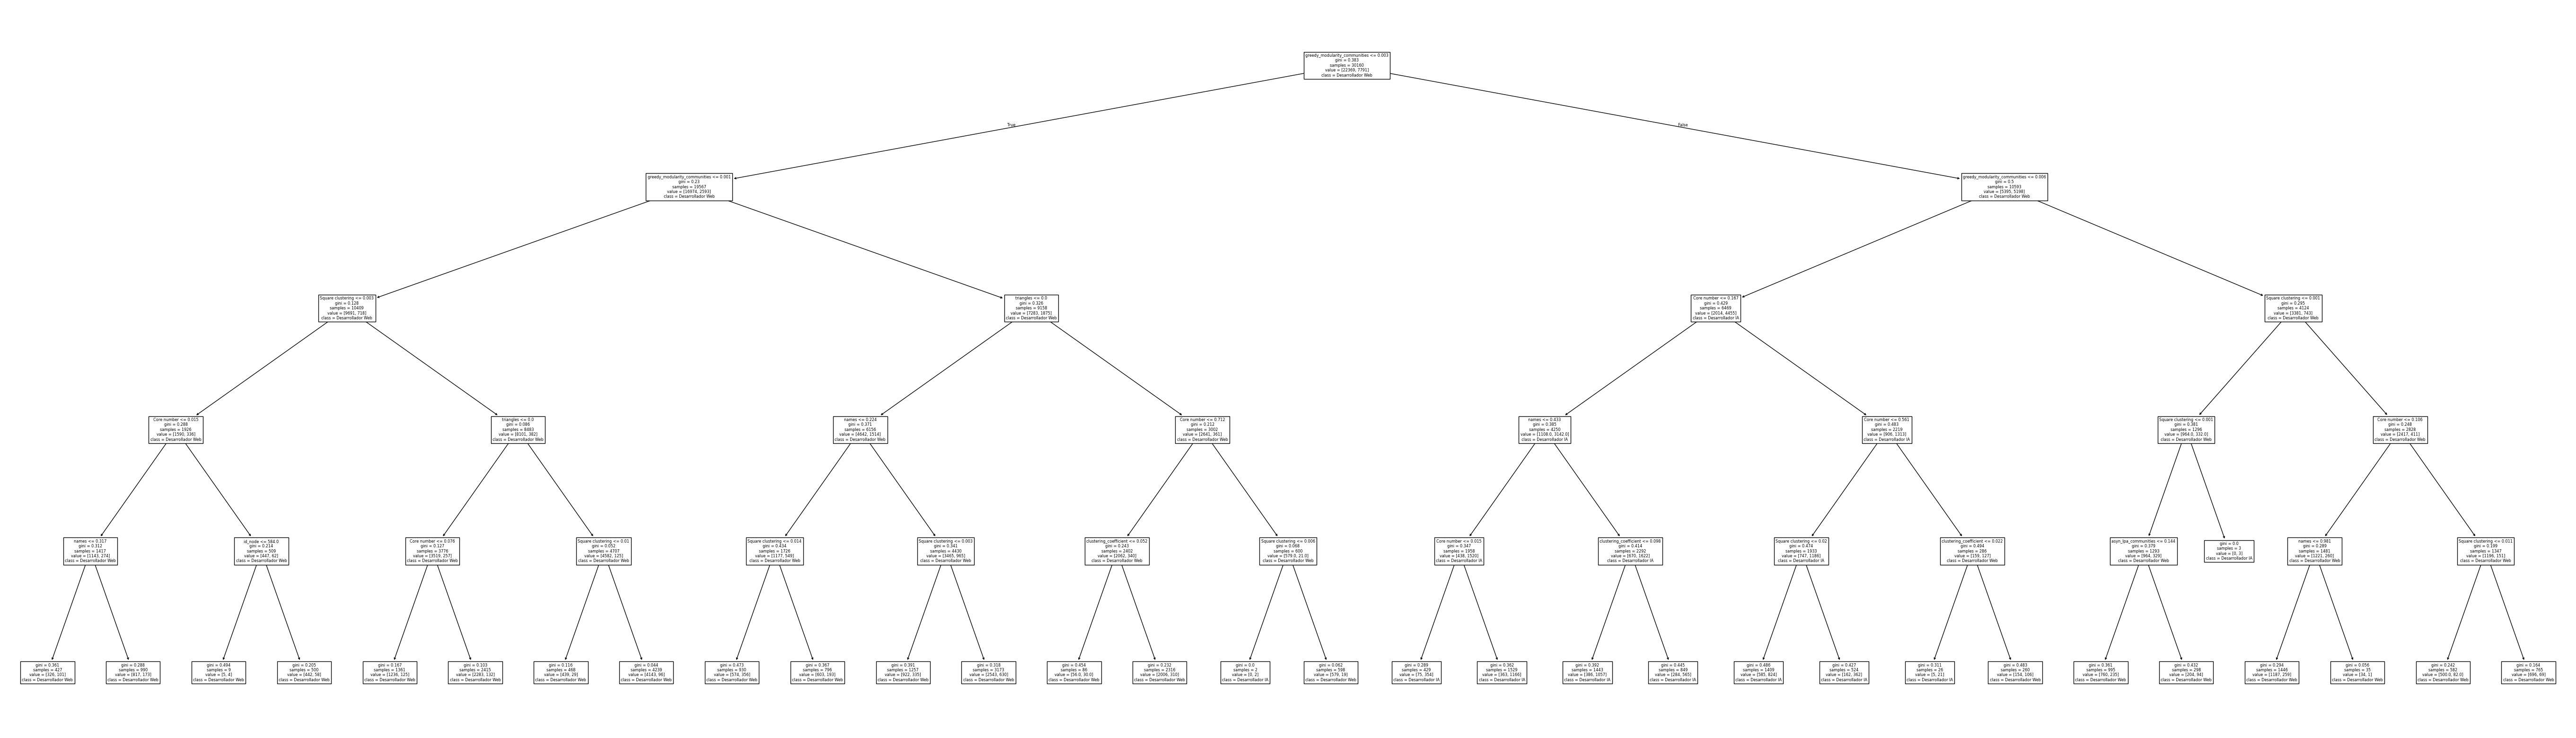

In [179]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol_WithoutCentrality = plot_tree(clasificador_WithoutCentrality_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=['id_node','names','clustering_coefficient','Square clustering','triangles',
                                 'greedy_modularity_communities','Core number','asyn_lpa_communities'],
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

# Conclusiones del estudio

Como podemos ver el siguente recuadro, para nuestro problema las métricas de comunidad son muy importante, ya que bajan la confianza en un 16,15%, las métricas de agrupamiento y centralidad no son necesarias ya que sin ella el árbol consigue una mejor confianza, en el caso de no tener la de centralidad sube en un 0,02%, no es algo muy significativo, pero hay que tenerlo en cuenta y sin las de agrupamiento la confianza sube en un 0,23% que ya es algo mas significativo. Por último sin las métricas de núcleo la confianza es la misma, esto quiere decir que aunque no las tengamos se puede llegar a tener una buena confianza.

Ahora lo que podemos ver de las matrices de confusión, que todas intenta predecir y la mayoría lo hacen mejor que una máquina aleatoria, ya que hay que tener en cuenta que partimos de un dataset que tiene un 75% de desarrolladores web y un 25% de desarrolladores IA. Pero en el caso de sin las métricas de agrupamiento vemos que da mucho falsos negativos, esto quiere decir que como hay muchos datos de desarrolladores web, al no tener datos igualados, no llega a poder predecirlos bien.

In [180]:
print("Confianza del dataser con todas las métricas:",recall_score_all.round(decimals=4)*100)
print("Confianza del dataser sin las métricas de agrupamiento:",recall_WithoutClustering_score.round(decimals=4)*100)
print("Confianza del dataser sin las métricas de comunidad:",recall_WithoutCommunity_score.round(decimals=4)*100)
print("Confianza del dataser sin las métricas de núcleo:",recall_WithoutKernel_score.round(decimals=4)*100)
print("Confianza del dataser sin las métricas de centralidad:",recall_WithoutCentrality_score.round(decimals=4)*100)

Confianza del dataser con todas las métricas: 69.24
Confianza del dataser sin las métricas de agrupamiento: 69.47
Confianza del dataser sin las métricas de comunidad: 53.09
Confianza del dataser sin las métricas de núcleo: 69.24
Confianza del dataser sin las métricas de centralidad: 69.26
